In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
import seaborn as sns
import requests
import numpy as np

url = 'https://github.com/Giofabro/exercise-data-analysis/raw/main/Data_Repository/Education_data Final Project.csv'
response = requests.get(url)
open('Education_data Final Project.csv', 'wb').write(response.content)

# load in the data
education_df = pd.read_csv("Education_data Final Project.csv")

# line
line = "____________________"

## Check Dataframe

In [2]:
print(education_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   class_date         999 non-null    object
 1   user_uuid          999 non-null    int64 
 2   category           999 non-null    object
 3   trainer_id         999 non-null    int64 
 4   language           999 non-null    object
 5   level              999 non-null    object
 6   challenge_id       999 non-null    int64 
 7   country            999 non-null    object
 8   subscription_date  999 non-null    object
 9   platform           999 non-null    object
 10  class_id           999 non-null    int64 
 11  stars              999 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 93.8+ KB
None


In [3]:
# Scartare valore null
education_df = education_df.dropna()

# Scartare duplicati
education_df = education_df.drop_duplicates()

In [4]:
# Converti le colonne "class_date" e "subscription_date" in formato datetime
education_df['class_date'] = pd.to_datetime(education_df['class_date'], format='%d-%m-%Y')
education_df['subscription_date'] = pd.to_datetime(education_df['subscription_date'], format='%d-%m-%Y')


# Analisi dataframe -> Generale

In [5]:
education_df

,class_date,user_uuid,category,trainer_id,language,level,challenge_id,country,subscription_date,platform,class_id,stars
0,2023-10-05,195,statistics,110,en,basic,2,uk,2022-12-09,tv,6171,1
1,2022-12-02,63,statistics,114,en,basic,0,uk,2020-02-27,mobile,6159,3
2,2023-07-22,32,data_science,118,it,advanced,3,it,2022-03-07,pc,3363,3
3,2021-05-20,67,statistics,114,fr,basic,1,fr,2020-10-01,tv,6175,2
4,2023-08-18,97,data_science,109,it,basic,1,it,2021-05-21,mobile,3179,2
...,...,...,...,...,...,...,...,...,...,...,...,...
994,2022-01-17,212,data_analysis,118,fr,advanced,1,fr,2020-02-27,tv,2349,2
995,2022-11-09,83,SEO,106,it,basic,0,it,2020-07-23,tv,6196,3
996,2022-07-28,203,UX,117,it,intermediate,3,it,2021-03-28,pc,1290,5
997,2022-10-06,138,data_science,100,it,intermediate,1,it,2020-04-06,mobile,3229,1


In [6]:
# Totale utenti 
unique_users_uuid = education_df['user_uuid'].nunique()
print(unique_users_uuid)

241


In [7]:
# Totale classi
unique_class_id = education_df['class_id'].nunique()
print(unique_class_id)

639


In [8]:
# Totale insegnanti
unique_trainer_id = education_df['trainer_id'].nunique()
print(unique_trainer_id)

23


## Step 1

Abbiamo quasi 250 studenti e un numero di classi considerevoli. Gli insegnante sono appena 23. Capiamo meglio lo status del nostro istituto. 

advanced        44.444444
basic           35.135135
intermediate    20.420420
Name: level, dtype: float64
____________________
it    48.148148
uk    31.031031
fr    20.820821
Name: country, dtype: float64
____________________
tv        42.042042
pc        35.135135
mobile    22.822823
Name: platform, dtype: float64
____________________


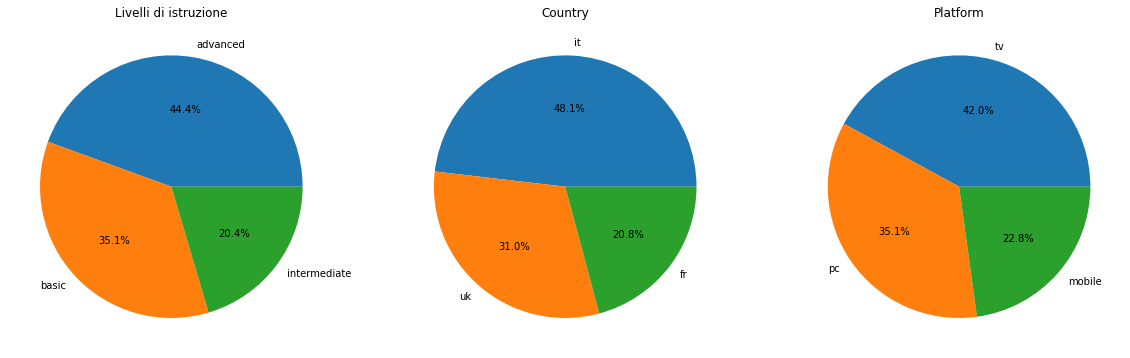

In [9]:
# Personalizzazione grafici
plt.figure(figsize=(20, 12))

# frist analysis + graph
level_props = education_df.level.value_counts() / len(education_df.level) * 100
print(level_props)
print(line)
plt.subplot(1,3,1)
plt.pie(level_props, labels=level_props.index, autopct="%0.1f%%")
plt.title('Livelli di istruzione')


# second analysis + graph
country_props = education_df.country.value_counts() / len(education_df.country) * 100
print(country_props)
print(line)
plt.subplot(1,3,2)
plt.pie(country_props, labels=country_props.index, autopct="%0.1f%%")
plt.title('Country')

#third analysis + graph
platform_props = education_df.platform.value_counts() / len(education_df.platform) * 100
print(platform_props)
print(line)
plt.subplot(1,3,3)
plt.pie(platform_props, labels=platform_props.index, autopct="%0.1f%%")
plt.title('Platform')

plt.show()

## Step 2

Il livello di istruzione è suddiviso quasi in una forchetta: o troppo advanced o troppo basic. Bisognerebbe attenzionare gli studenti basic e rimpolpare le statistiche almeno del livello intermediate. Buona parte dei nostri studenti sono italiani. A sorpresa, buona parte della fruizione dei contenuti scolastici avviene mediante la TV. 

Capiamo adesso le materie preferite degli studenti.

In [10]:
category_props = education_df.category.value_counts() / len(education_df.category) * 100
print(category_props)

statistics       32.832833
UX               15.915916
data_analysis    14.614615
data_science     12.812813
full_stack        9.709710
SEO               7.707708
copywriting       6.406406
Name: category, dtype: float64


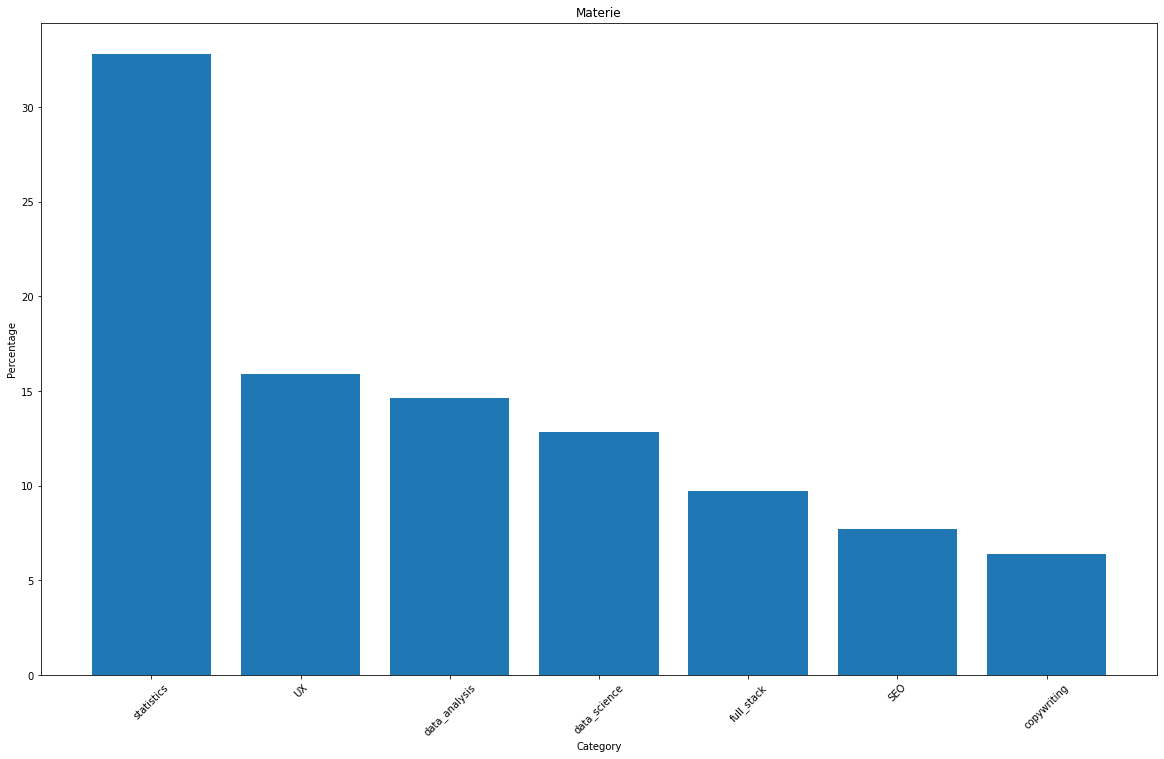

In [11]:
# Personalizzazione grafici
plt.figure(figsize=(20, 12))

# Bar Plot
plt.bar(category_props.index, category_props.values)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Materie')

plt.show()

Le materie a matrice matematica sono molto apprezzate (Statistics -> 32.8%, Data Analysis -> 14.6%  e Data Science -> 12.8% ). Potrebbe essere un ottimo spunto per creare una "Persona". Materie legate al Digital Marketink relegati alla fine. 

# Analisi dataframe -> 2021

Riapplichiamo le nostre analisi precedenti all'anno 2021. Ci sono differenze? 

In [12]:
# Filtrare il dataframe solo per le righe con date del 2021
education_df_2021 = education_df[education_df.class_date.dt.year == 2021]

In [13]:
education_df_2021

,class_date,user_uuid,category,trainer_id,language,level,challenge_id,country,subscription_date,platform,class_id,stars
3,2021-05-20,67,statistics,114,fr,basic,1,fr,2020-10-01,tv,6175,2
5,2021-06-16,69,statistics,113,en,advanced,0,uk,2020-08-23,tv,6314,4
19,2021-08-19,65,UX,121,fr,intermediate,0,fr,2020-05-04,tv,1270,3
50,2021-09-01,121,full_stack,110,it,basic,3,it,2020-11-03,pc,6178,3
55,2021-05-03,149,full_stack,106,en,intermediate,2,uk,2020-05-11,mobile,6227,1
...,...,...,...,...,...,...,...,...,...,...,...,...
966,2021-11-21,199,statistics,113,fr,advanced,1,fr,2020-07-27,pc,6330,2
977,2021-09-23,19,copywriting,119,it,advanced,1,it,2020-04-12,pc,536,2
980,2021-08-08,65,UX,121,it,advanced,1,it,2020-05-04,pc,1334,2
987,2021-08-27,192,full_stack,109,fr,basic,2,fr,2020-05-01,tv,6135,4


Riaplichiamo le nostre analisi, filtrate per il 2021

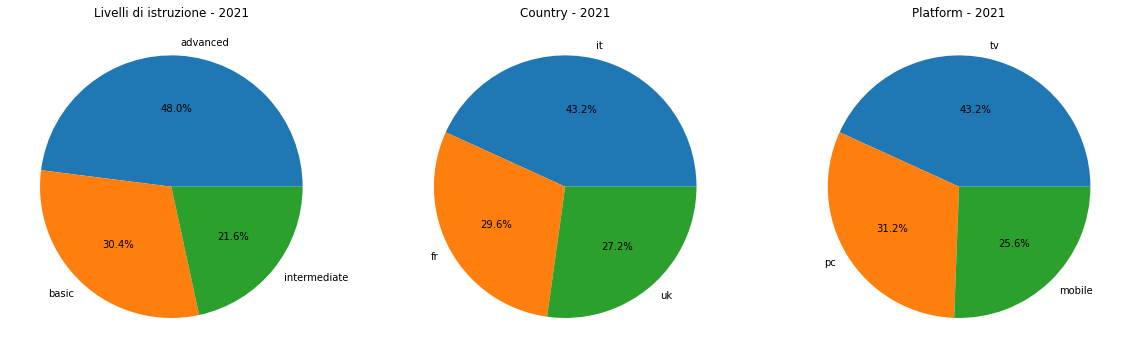

In [21]:
# Personalizzazione grafici
plt.figure(figsize=(20, 12))

# Prima analisi + grafico per education_df_2021
level_props_2021 = education_df_2021.level.value_counts() / len(education_df_2021.level) * 100
plt.subplot(1,3,1)
plt.pie(level_props_2021, labels=level_props_2021.index, autopct="%0.1f%%")
plt.title('Livelli di istruzione - 2021')

# Seconda analisi + grafico per education_df_2021
country_props_2021 = education_df_2021.country.value_counts() / len(education_df_2021.country) * 100
plt.subplot(1,3,2)
plt.pie(country_props_2021, labels=country_props_2021.index, autopct="%0.1f%%")
plt.title('Country - 2021')

# Terza analisi + grafico per education_df_2021
platform_props_2021 = education_df_2021.platform.value_counts() / len(education_df_2021.platform) * 100
plt.subplot(1,3,3)
plt.pie(platform_props_2021, labels=platform_props_2021.index, autopct="%0.1f%%")
plt.title('Platform - 2021')

plt.show()

In [15]:
category_props_2021 = education_df_2021.category.value_counts() / len(education_df_2021.category) * 100
print(category_props_2021)

statistics       35.2
UX               16.8
data_science     13.6
data_analysis    11.2
full_stack       10.4
copywriting       7.2
SEO               5.6
Name: category, dtype: float64


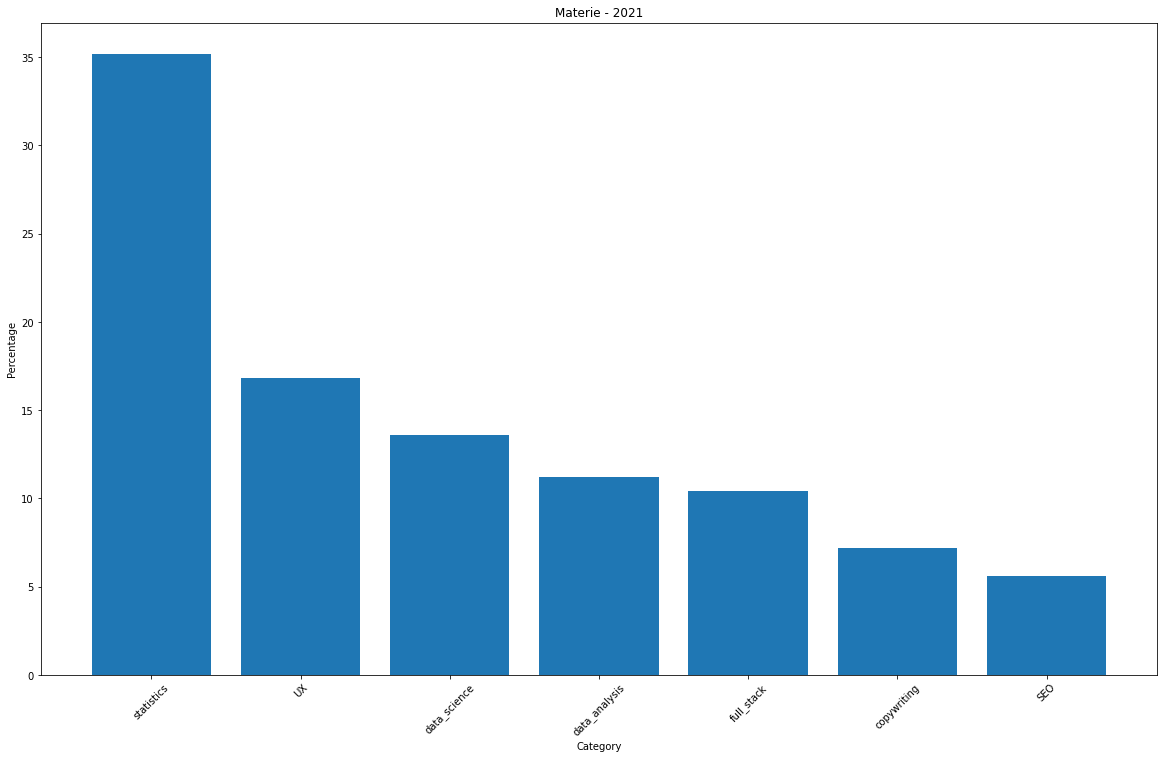

In [25]:
# Personalizzazione grafici
plt.figure(figsize=(20, 12))

category_props_2021 = education_df_2021.category.value_counts() / len(education_df_2021.category) * 100
plt.bar(category_props_2021.index, category_props_2021.values)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Materie - 2021')

plt.show()


## Considerazioni 

Il livello degli studenti advanced è stato maggiore rispetto a un'analisi complessiva -> 48%. Resta l'impressione iniziale: divario considerevole tra studenti advanced e basic. 

Gli studenti francesi rappresentavano una fetta maggiore -> 29.6%. Basta focus solo tra lingua italiano e inglese. Un altro interessante spunto per una "Persona". 

Il copywriting ha riscontrato un interesse da parte di più studenti rispetto alla SEO. Tuttavia, le percentuale di entrambi le categorie resta basso. 

# Download per tableau 

Scarichiamo adesso il nostro dataframe per proseguire le analisi su Tableau. RFT = Ready for Tableau

In [26]:
education_df.to_csv('education_df_RFT.csv', index=False)